In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pickle as pkl

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

In [3]:
churn=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')

In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
churn.drop('customerID',axis=1,inplace=True)

In [6]:
churn['TotalCharges']=churn['TotalCharges'].replace(' ', np.NaN)
churn['TotalCharges']=churn['TotalCharges'].astype(float)
churn['TotalCharges']=churn['TotalCharges'].fillna(churn['TotalCharges'].median())

In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
columns_to_encode = churn.select_dtypes(include=['object','float64']).columns
# Instantiate LabelEncoder
lE= LabelEncoder()
for column in columns_to_encode:
    churn[column] = lE.fit_transform(churn[column])

In [9]:
 churn

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,536,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,674,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,991,3701,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,1340,6305,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,137,1265,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,795,1157,1


In [10]:
 churn.corr()['Churn'].sort_values(ascending=False)

Churn               1.000000
PaperlessBilling    0.191825
MonthlyCharges      0.183523
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.230754
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

i did not use correlation because random forest it did not provide me with the best features to train with

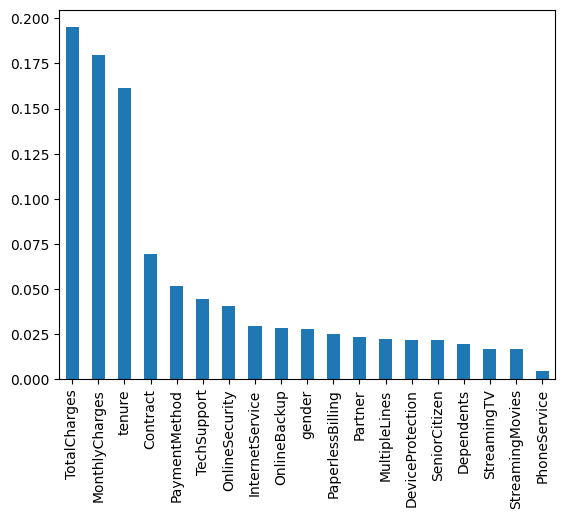

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = churn.drop('Churn', axis=1)
y = churn['Churn']

# Fit a RandomForestClassifier to identify feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()


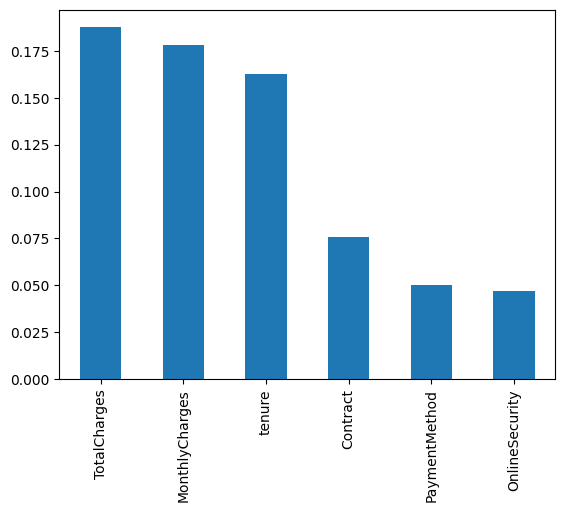

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Assuming 'X' is your feature matrix and 'y' is your target variable
X = churn.drop('Churn', axis=1)
y = churn['Churn']

# Fit a RandomForestClassifier to identify feature importance
rf_model = RandomForestClassifier()
rf_model.fit(X, y)

# Display feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Select the first six features
selected_features = feature_importances.sort_values(ascending=False).index[:6]

# Plot the feature importances for the selected features
feature_importances[selected_features].sort_values(ascending=False).plot(kind='bar')
plt.show()


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

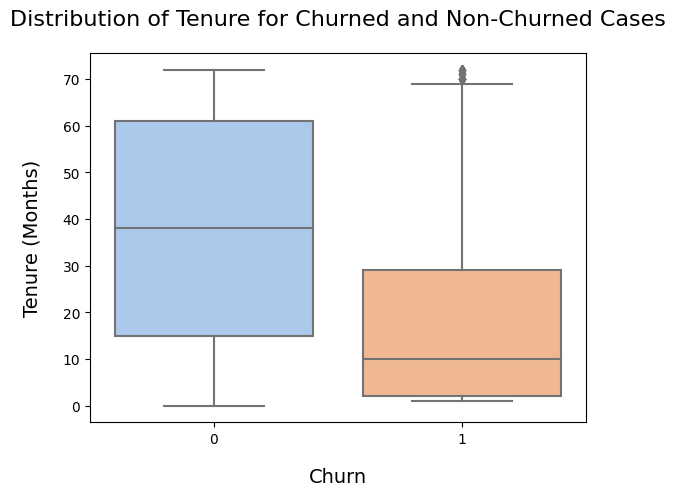

In [14]:
# Use Seaborn's boxplot for better visualization
sns.boxplot(x='Churn', y='tenure', data=churn, palette='pastel')

# Set plot labels and title with increased padding
plt.title('Distribution of Tenure for Churned and Non-Churned Cases', fontsize=16, pad=20)
plt.xlabel('Churn', fontsize=14, labelpad=15)
plt.ylabel('Tenure (Months)', fontsize=14, labelpad=15)

# Show the plot
plt.show()

this shows that, the longer you stay, the more committed you are to the company and the less likely you are to churn.

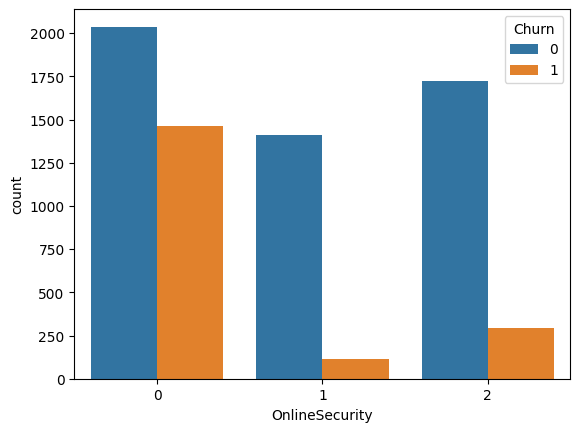

In [15]:
# Create a contingency table
contingency_table = pd.crosstab(feature_importances['OnlineSecurity'], churn['Churn'])

# Plot the bar plot
sns.countplot(x='OnlineSecurity', hue='Churn', data=churn)
plt.show()


this demonstates that, when there is high online security, workers are not likely to churn and when there is low online security, workers are likely to churn.

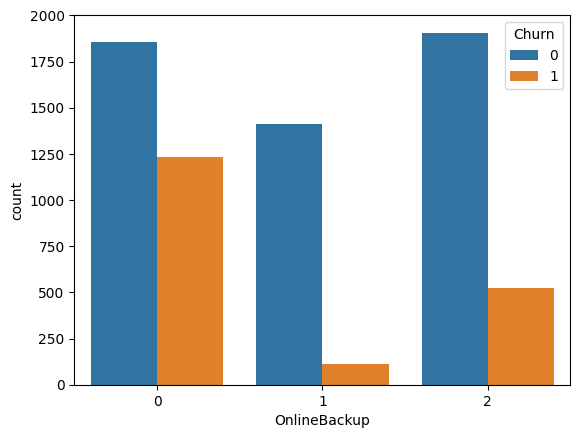

In [16]:
# Create a count plot to visualize the relationship
sns.countplot(x='OnlineBackup', hue='Churn', data=churn)

# Show the plot
plt.show()

this shows that the relatioship is really strong, they are highly the inverse of the themselves.


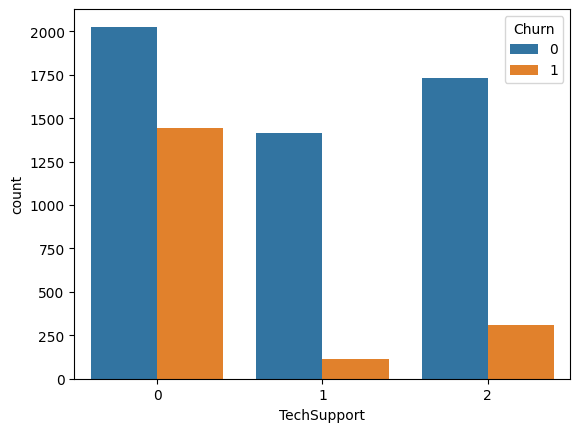

In [17]:
sns.countplot(x='TechSupport', hue='Churn', data=churn)

plt.show()

By observing the graph, you can infer patterns such as whether customers with technical support ("Yes") are more or less likely to churn compared to those without technical support ("No").

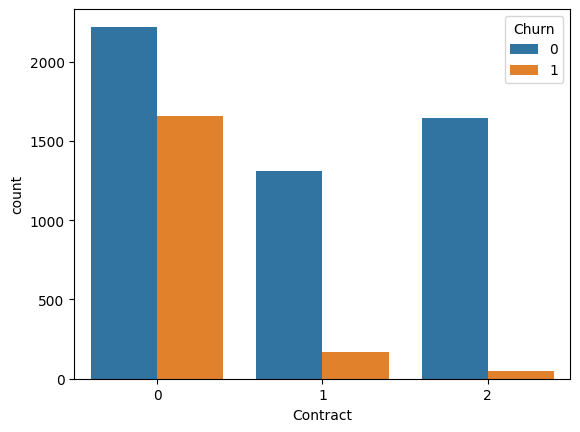

In [18]:
sns.countplot(x='Contract', hue='Churn', data=churn)

plt.show()

it enables the identification of variations in churn likelihood across contracts.For instance, if the bars corresponding to "Month-to-month" contracts are predominantly higher in the "Churn: Yes" section, it implies that customers with month-to-month contracts exhibit a higher likelihood of churning compared to other contract types.

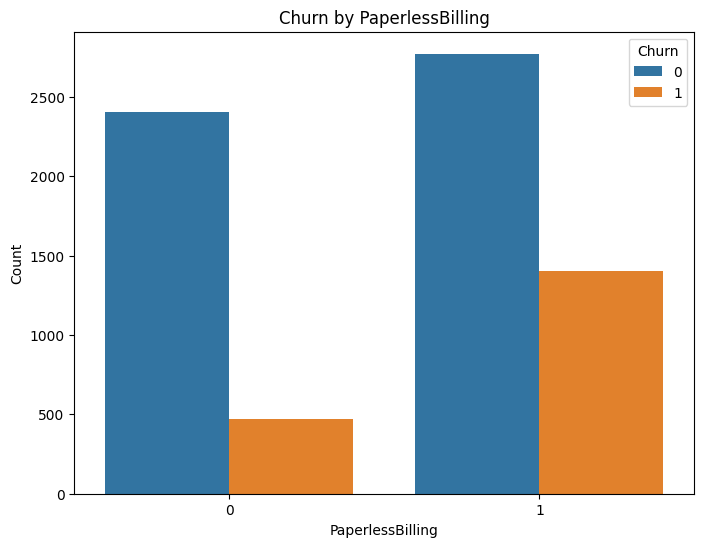

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(x='PaperlessBilling', hue='Churn', data=churn)
plt.title('Churn by PaperlessBilling')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.show()

By observing the heights of the bars for each category of 'PaperlessBilling', you can visually compare the distribution of customers who have opted for paperless billing and those who have not, further differentiated by their churn status.

In [20]:
y = churn['Churn']
X = churn[selected_features]

In [21]:
X

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity
0,74,142,1,0,2,0
1,3625,498,34,1,3,2
2,536,436,2,0,3,2
3,3571,266,45,1,0,2
4,674,729,2,0,2,0
...,...,...,...,...,...,...
7038,3701,991,24,1,3,2
7039,6305,1340,72,1,1,0
7040,1265,137,11,0,2,2
7041,1157,795,4,0,3,0


In [22]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# new DataFrame with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df


,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity
0,-1.559291,-1.131766,-1.277445,-0.828207,0.398558,-0.918838
1,0.269671,-0.387740,0.066327,0.371271,1.334863,1.407321
2,-1.321335,-0.517317,-1.236724,-0.828207,1.334863,1.407321
3,0.241858,-0.872611,0.514251,0.371271,-1.474052,1.407321
4,-1.250258,0.095041,-1.236724,-0.828207,0.398558,-0.918838
...,...,...,...,...,...,...
7038,0.308815,0.642612,-0.340876,0.371271,1.334863,1.407321
7039,1.650019,1.372008,1.613701,0.371271,-0.537747,-0.918838
7040,-0.945860,-1.142216,-0.870241,-0.828207,0.398558,1.407321
7041,-1.001486,0.232979,-1.155283,-0.828207,1.334863,-0.918838


In [24]:
feature_importances

gender              0.027805
SeniorCitizen       0.020884
Partner             0.022769
Dependents          0.019663
tenure              0.162404
PhoneService        0.004956
MultipleLines       0.022591
InternetService     0.029645
OnlineSecurity      0.046775
OnlineBackup        0.027781
DeviceProtection    0.023262
TechSupport         0.039765
StreamingTV         0.017317
StreamingMovies     0.017399
Contract            0.075527
PaperlessBilling    0.025335
PaymentMethod       0.050454
MonthlyCharges      0.178165
TotalCharges        0.187505
dtype: float64

In [25]:
feature_importances.describe()

count    19.000000
mean      0.052632
std       0.057130
min       0.004956
25%       0.021738
50%       0.027781
75%       0.048614
max       0.187505
dtype: float64

In [26]:
X_scaled_df

,TotalCharges,MonthlyCharges,tenure,Contract,PaymentMethod,OnlineSecurity
0,-1.559291,-1.131766,-1.277445,-0.828207,0.398558,-0.918838
1,0.269671,-0.387740,0.066327,0.371271,1.334863,1.407321
2,-1.321335,-0.517317,-1.236724,-0.828207,1.334863,1.407321
3,0.241858,-0.872611,0.514251,0.371271,-1.474052,1.407321
4,-1.250258,0.095041,-1.236724,-0.828207,0.398558,-0.918838
...,...,...,...,...,...,...
7038,0.308815,0.642612,-0.340876,0.371271,1.334863,1.407321
7039,1.650019,1.372008,1.613701,0.371271,-0.537747,-0.918838
7040,-0.945860,-1.142216,-0.870241,-0.828207,0.398558,1.407321
7041,-1.001486,0.232979,-1.155283,-0.828207,1.334863,-0.918838


In [27]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [28]:
# Split the data into training and testing sets (if necessary)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

In [ ]:
X_train

In [29]:
# Create a tree-based model (Random Forest in this example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# RFECV object
rfecv = RFECV(estimator=model, step=1, cv=3, scoring='accuracy')

rfecv.fit(X_train, y_train)

# elected features
feature_importances = X_train.columns[rfecv.support_]

In [30]:
optimal_num_features = rfecv.n_features_
support_mask = rfecv.support_
feature_importances = X.columns[support_mask]
feature_importances

Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod',
       'OnlineSecurity'],
      dtype='object')

In [34]:
X_train.columns

Index(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract', 'PaymentMethod',
       'OnlineSecurity'],
      dtype='object')

In [31]:
import keras
from keras.models import Model
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.utils import to_categorical

In [32]:
input_layer = Input(shape=(X_train.shape[1],))
hidden_layer_1 = Dense(32, activation='relu')(input_layer)
hidden_layer_2 = Dense(24, activation='relu')(hidden_layer_1)
hidden_layer_3 = Dense(12, activation='relu')(hidden_layer_2)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_3)

model = Model(inputs=input_layer, outputs=output_layer)

In [33]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/300
177/177 [==============================] - 6s 10ms/step - loss: 0.5924 - accuracy: 0.7343 - val_loss: 0.5480 - val_accuracy: 0.7353
Epoch 2/300
177/177 [==============================] - 1s 8ms/step - loss: 0.5221 - accuracy: 0.7345 - val_loss: 0.4932 - val_accuracy: 0.7353
Epoch 3/300
177/177 [==============================] - 2s 13ms/step - loss: 0.4861 - accuracy: 0.7345 - val_loss: 0.4677 - val_accuracy: 0.7353
Epoch 4/300
177/177 [==============================] - 2s 13ms/step - loss: 0.4691 - accuracy: 0.7343 - val_loss: 0.4537 - val_accuracy: 0.7353
Epoch 5/300
177/177 [==============================] - 2s 10ms/step - loss: 0.4593 - accuracy: 0.7694 - val_loss: 0.4449 - val_accuracy: 0.7835
Epoch 6/300
177/177 [==============================] - 2s 9ms/step - loss: 0.4531 - accuracy: 0.7790 - val_loss: 0.4387 - val_accuracy: 0.7892
Epoch 7/300
177/177 [==============================] - 1s 5ms/step - loss: 0.4486 - accuracy: 0.7845 - val_loss: 0.4341 - val_accuracy: 0.

KeyboardInterrupt: ignored

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
accuracy*100

In [ ]:
!pip install scikeras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
#!pip install scikeras
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score


In [ ]:
# Define the model using the Functional API
def build_model(units=64, activation='relu', dropout_rate=0.3):
    # Define input layer
    inputs = Input(shape=(X_train.shape[1],))

    # Add a hidden layer with dropout
    x = Dense(units, activation=activation)(inputs)
    x = Dropout(rate=dropout_rate)(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Create a KerasClassifier for compatibility with scikit-learn
keras_classifier = KerasClassifier(build_fn=build_model, epochs=5, batch_size=32, verbose=1)

# Define hyperparameters to search
param_grid = {
    'epochs': [10, 20, 30],
    'batch_size': [16, 64, 128]
}

# Create a KerasClassifier for compatibility with scikit-learn
keras_classifier = KerasClassifier(build_fn=build_model, epochs=5, batch_size=32, verbose=1)


In [ ]:
# Create GridSearchCV
grid_search = GridSearchCV(estimator=keras_classifier, param_grid=param_grid, cv=3, scoring='accuracy',verbose=1)


In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [ ]:
# Train the best model on the entire training set
best_model.fit(X_train, y_train, verbose=0)

In [ ]:
# Evaluate the best model on the test set
y_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Extract probabilities for the positive class (change index to 1)
y_pred = (y_pred_proba > 0.5).astype(int)  # Thresholding at 0.5 to make binary predictions


In [ ]:

accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred_proba)

In [ ]:
accuracy

In [ ]:

auc_score

In [ ]:
("Best Hyperparameters:")
best_params

In [ ]:
best_model.model_.save('churn_assign.h5')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


# Print classification report
"Classification Report:"
classification_report(y_test, y_pred)

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
"Confusion Matrix:"
conf_matrix


In [ ]:
with open ('scalar.pkl','wb') as file:
  pkl.dump(scaler,file)